In [1]:

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import data
daily_metrics_sorted =pd.read_csv('../dataset/daily_metrics_sorted.csv', parse_dates=['date'])
price_volume_sorted = pd.read_csv('../dataset/price_volume_sorted.csv', parse_dates=['date'])
event_filtered= pd.read_csv('../dataset/event_filtered.csv', parse_dates=['date'])



In [4]:
tickers_df =pd.read_csv('../dataset/tickers.csv')
tickers = tickers_df.to_numpy()

In [5]:
tickers_df.head()

,0
0,AAME
1,AAOI
2,ABCP
3,ABEO
4,ABIO


In [6]:
#flatten the array
tickers = tickers.flatten()

In [7]:
tickers

array(['AAME', 'AAOI', 'ABCP', ..., 'ZMTP', 'ZNOG', 'ZYXI'], dtype=object)

In [8]:
daily_metrics_sorted.head()

,ticker,date,lastupdated,ev,evebit,evebitda,marketcap,pb,pe,ps,sales,evsales
0,AAME,2015-03-31,2018-10-18,100.3,15.4,13.5,82.9,0.8,20.9,0.5,41.45,2.419783
1,AAME,2015-04-01,2018-10-18,99.3,15.3,13.3,81.9,0.8,20.7,0.5,40.95,2.424908
2,AAME,2015-04-02,2018-10-18,98.9,15.2,13.3,81.5,0.8,20.6,0.5,40.75,2.426994
3,AAME,2015-04-06,2018-10-18,98.9,15.2,13.3,81.5,0.8,20.6,0.5,40.75,2.426994
4,AAME,2015-04-07,2018-10-18,98.5,15.1,13.2,81.1,0.8,20.5,0.5,40.55,2.429100


In [9]:
price_volume_sorted.head()

,ticker,date,open,high,low,close,volume
0,AAME,2015-01-02,3.990,4.03,3.980,4.03,11443.0
1,AAME,2015-01-05,3.900,4.01,3.900,4.01,13727.0
2,AAME,2015-01-06,3.950,3.95,3.750,3.92,9743.0
3,AAME,2015-01-07,3.899,3.92,3.870,3.92,1486.0
4,AAME,2015-01-08,3.920,3.95,3.915,3.95,2200.0


In [10]:
event_filtered.head()

,ticker,date,11,12,13,14,21,22,23,24,...,52,53,54,55,56,57,58,71,81,91
0,ABIO,2020-12-23,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,AGTC,2020-12-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,AIM,2020-12-23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIRT,2020-12-23,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,ALSK,2020-12-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cleaning up and merging Data

## CLean up event_filtered

In [12]:
event_filtered

,ticker,date,11,12,13,14,21,22,23,24,...,52,53,54,55,56,57,58,71,81,91
0,ABIO,2020-12-23,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,AGTC,2020-12-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,AIM,2020-12-23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIRT,2020-12-23,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,ALSK,2020-12-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100076,VICA,2015-01-02,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100077,VNRX,2015-01-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100078,VUZI,2015-01-02,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
100079,WINT,2015-01-02,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
# make date the index
event_filtered.set_index('date', inplace=True)


In [14]:
event_filtered.sort_values('ticker', ascending=True, inplace=True)


In [15]:
event_filtered.head()

,ticker,11,12,13,14,21,22,23,24,25,...,52,53,54,55,56,57,58,71,81,91
date,,,,,,,,,,,,,,,,,,,,,
2017-05-11,AAME,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2019-12-18,AAME,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-11-10,AAME,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-09-17,AAME,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-08-12,AAME,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
event_filtered.tail()

,ticker,11,12,13,14,21,22,23,24,25,...,52,53,54,55,56,57,58,71,81,91
date,,,,,,,,,,,,,,,,,,,,,
2017-11-21,ZYXI,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-08-19,ZYXI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-23,ZYXI,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2020-07-20,ZYXI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-28,ZYXI,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Clean up price volume

In [21]:
price_volume_sorted

,ticker,date,open,high,low,close,volume
0,AAME,2015-01-02,3.990,4.03,3.980,4.03,11443.0
1,AAME,2015-01-05,3.900,4.01,3.900,4.01,13727.0
2,AAME,2015-01-06,3.950,3.95,3.750,3.92,9743.0
3,AAME,2015-01-07,3.899,3.92,3.870,3.92,1486.0
4,AAME,2015-01-08,3.920,3.95,3.915,3.95,2200.0
...,...,...,...,...,...,...,...
1890769,ZYXI,2020-12-14,13.100,13.59,13.100,13.34,446678.0
1890770,ZYXI,2020-12-15,13.450,13.45,13.030,13.18,372095.0
1890771,ZYXI,2020-12-16,13.240,13.95,13.240,13.87,560581.0
1890772,ZYXI,2020-12-17,13.940,14.29,13.701,14.25,409889.0


In [22]:
price_volume_sorted.set_index('date', inplace=True)


NameError: name 'df' is not defined

In [23]:
price_volume_sorted.head()

,ticker,open,high,low,close,volume
date,,,,,,
2015-01-02,AAME,3.990,4.03,3.980,4.03,11443.0
2015-01-05,AAME,3.900,4.01,3.900,4.01,13727.0
2015-01-06,AAME,3.950,3.95,3.750,3.92,9743.0
2015-01-07,AAME,3.899,3.92,3.870,3.92,1486.0
2015-01-08,AAME,3.920,3.95,3.915,3.95,2200.0


# Clean up daily metrics

In [24]:
daily_metrics_sorted = daily_metrics_sorted.drop(columns=['lastupdated'],axis = 1 )

In [25]:
daily_metrics_sorted.set_index('date', inplace=True)


In [26]:
daily_metrics_sorted.head()

,ticker,ev,evebit,evebitda,marketcap,pb,pe,ps,sales,evsales
date,,,,,,,,,,
2015-03-31,AAME,100.3,15.4,13.5,82.9,0.8,20.9,0.5,41.45,2.419783
2015-04-01,AAME,99.3,15.3,13.3,81.9,0.8,20.7,0.5,40.95,2.424908
2015-04-02,AAME,98.9,15.2,13.3,81.5,0.8,20.6,0.5,40.75,2.426994
2015-04-06,AAME,98.9,15.2,13.3,81.5,0.8,20.6,0.5,40.75,2.426994
2015-04-07,AAME,98.5,15.1,13.2,81.1,0.8,20.5,0.5,40.55,2.429100


# Time Period

In [27]:
daily_metrics_sorted.tail()

,ticker,ev,evebit,evebitda,marketcap,pb,pe,ps,sales,evsales
date,,,,,,,,,,
2020-12-14,ZYXI,427.1,36.6,31.6,463.4,8.5,45.3,6.7,3104.78,0.137562
2020-12-15,ZYXI,421.6,36.1,31.2,457.9,8.4,44.7,6.7,3067.93,0.137422
2020-12-16,ZYXI,445.6,38.1,32.9,481.9,8.9,47.1,7.0,3373.30,0.132096
2020-12-17,ZYXI,458.8,39.3,33.9,495.1,9.1,48.4,7.2,3564.72,0.128706
2020-12-18,ZYXI,450.1,38.5,33.3,486.4,9.0,47.5,7.1,3453.44,0.130334


In [28]:
daily_metrics_sorted_one_year = daily_metrics_sorted.loc['2020-11-18':'2020-12-18']
daily_metrics_sorted_one_year.head()

,ticker,ev,evebit,evebitda,marketcap,pb,pe,ps,sales,evsales
date,,,,,,,,,,
2020-11-18,AAME,69.1,17.8,13.6,44.3,0.3,37.2,0.2,8.86,7.799097
2020-11-19,AAME,68.7,17.7,13.6,43.9,0.3,36.8,0.2,8.78,7.824601
2020-11-20,AAME,69.9,18.0,13.8,45.1,0.4,37.8,0.2,9.02,7.749446
2020-11-23,AAME,69.1,17.8,13.6,44.3,0.3,37.2,0.2,8.86,7.799097
2020-11-24,AAME,67.5,17.4,13.3,42.7,0.3,35.8,0.2,8.54,7.903981


In [29]:
price_volume_sorted_one_year = price_volume_sorted.loc['2020-11-18':'2020-12-18']
price_volume_sorted_one_year.head()

,ticker,open,high,low,close,volume
date,,,,,,
2020-11-18,AAME,2.210,2.220,2.141,2.17,4088.0
2020-11-19,AAME,2.195,2.195,2.100,2.15,1467.0
2020-11-20,AAME,2.170,2.210,2.170,2.21,5132.0
2020-11-23,AAME,2.210,2.210,2.144,2.17,2327.0
2020-11-24,AAME,2.150,2.250,2.085,2.09,12504.0


In [30]:
event_filtered_one_year = event_filtered.loc['2020-11-18':'2020-12-18']
event_filtered_one_year.head()

,ticker,11,12,13,14,21,22,23,24,25,...,52,53,54,55,56,57,58,71,81,91
date,,,,,,,,,,,,,,,,,,,,,
2020-12-11,AAOI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-11-23,ABIO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-12-10,ABIO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2020-12-15,ABIO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-12-10,ABMC,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model Selection
As this is a time-series problem, we can use one of the following models to solve it:

- ARIMA/ARMA: Auto-Regressive Moving Average models are a class of model that captures a suite of different standard temporal structures in time series data.

- LSTM: Long-Short-Term_memory networks are a form of Recurrent Neural Networks. Few advantages of neural nets are:
Neural networks can model any non-linear function
Neural networks give good results without much parameter tuning

Aim: 
- We will try to predict the Price of the one stock based on the previous 60 values(i.e stock prices on the previous 30 days)
- We will only use the 'close' column to forecast the future stock price for simplicity. We will ignore all of the other columns.






# Model Preparation: Multiple Stocks

In [31]:
#store all the ticker into 1 list
stockList = price_volume_sorted.ticker.unique().tolist()
stockList

['AAME',
 'AAOI',
 'ABCP',
 'ABEO',
 'ABIO',
 'ABMC',
 'ACER',
 'ACFN',
 'ACHV',
 'ACMC',
 'ACNB',
 'ACRX',
 'ACU',
 'ACUR',
 'ACY',
 'ADMA',
 'ADMG',
 'ADMP',
 'ADMT',
 'ADUS',
 'ADYX',
 'AE',
 'AEGG',
 'AEHR',
 'AERI',
 'AEY',
 'AFHIF',
 'AGHC',
 'AGRX',
 'AGTC',
 'AGYS',
 'AHC',
 'AHH',
 'AHPI',
 'AIKI',
 'AIM',
 'AINC',
 'AIRI',
 'AIRT',
 'AKBA',
 'AKER',
 'ALBO',
 'ALDX',
 'ALIM',
 'ALOT',
 'ALSK',
 'ALT',
 'ALTX',
 'AMNB',
 'AMOT',
 'AMPE',
 'AMRB',
 'AMRK',
 'AMRS',
 'AMS',
 'AMSC',
 'AMSWA',
 'AMTX',
 'AMTY',
 'ANDR',
 'ANFC',
 'ANIX',
 'AOLS',
 'AOSL',
 'AP',
 'APDN',
 'APEN',
 'APEX',
 'APPS',
 'APT',
 'APTS',
 'APYX',
 'ARDX',
 'ARKR',
 'ARL',
 'ARMP',
 'ARNI',
 'ARTH',
 'ARTNA',
 'ARTW',
 'ASMB',
 'ASNB',
 'ASPN',
 'ASPU',
 'ASRV',
 'ASTC',
 'ASUR',
 'ASYS',
 'ATEC',
 'ATHX',
 'ATLC',
 'ATLO',
 'ATMS',
 'ATNM',
 'ATOS',
 'ATRS',
 'ATRX',
 'AUBN',
 'AUMN',
 'AUPH',
 'AUTO',
 'AVEO',
 'AVLP',
 'AVNW',
 'AVXL',
 'AWH',
 'AWRE',
 'AWX',
 'AXGN',
 'AXIM',
 'AXR',
 'AXTI',
 'AYRO

In [32]:
# this is reading it in as a pandas but we lose some information in the process
# stocks_close = (
#     (pd.concat(
#         [pd.read_csv(f"../dataset/price_volume_tickers/{ticker}.csv", index_col='date', parse_dates=True)[
#             'close'
#         ].rename(ticker)
#         for ticker in tickers],
#         axis=1,
#         sort=True)
#     )
# )

# stocks_close

In [33]:
#reading in data from price_volume_tickers as a dictionary
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("../dataset/price_volume_tickers/" + i + ".csv", index_col= "date", parse_dates=["date"])

In [34]:
df_.keys()

dict_keys(['AAME', 'AAOI', 'ABCP', 'ABEO', 'ABIO', 'ABMC', 'ACER', 'ACFN', 'ACHV', 'ACMC', 'ACNB', 'ACRX', 'ACU', 'ACUR', 'ACY', 'ADMA', 'ADMG', 'ADMP', 'ADMT', 'ADUS', 'ADYX', 'AE', 'AEGG', 'AEHR', 'AERI', 'AEY', 'AFHIF', 'AGHC', 'AGRX', 'AGTC', 'AGYS', 'AHC', 'AHH', 'AHPI', 'AIKI', 'AIM', 'AINC', 'AIRI', 'AIRT', 'AKBA', 'AKER', 'ALBO', 'ALDX', 'ALIM', 'ALOT', 'ALSK', 'ALT', 'ALTX', 'AMNB', 'AMOT', 'AMPE', 'AMRB', 'AMRK', 'AMRS', 'AMS', 'AMSC', 'AMSWA', 'AMTX', 'AMTY', 'ANDR', 'ANFC', 'ANIX', 'AOLS', 'AOSL', 'AP', 'APDN', 'APEN', 'APEX', 'APPS', 'APT', 'APTS', 'APYX', 'ARDX', 'ARKR', 'ARL', 'ARMP', 'ARNI', 'ARTH', 'ARTNA', 'ARTW', 'ASMB', 'ASNB', 'ASPN', 'ASPU', 'ASRV', 'ASTC', 'ASUR', 'ASYS', 'ATEC', 'ATHX', 'ATLC', 'ATLO', 'ATMS', 'ATNM', 'ATOS', 'ATRS', 'ATRX', 'AUBN', 'AUMN', 'AUPH', 'AUTO', 'AVEO', 'AVLP', 'AVNW', 'AVXL', 'AWH', 'AWRE', 'AWX', 'AXGN', 'AXIM', 'AXR', 'AXTI', 'AYRO', 'BABB', 'BASI', 'BBGI', 'BBI', 'BBQ', 'BBW', 'BCBP', 'BCDA', 'BCLI', 'BCOV', 'BCRHF', 'BDGE', 'BDL'

In [35]:
#check the dictionary that we've created
for i in df_:
    print (i, df_[i])

AAME             Unnamed: 0 ticker   open  high    low  close   volume
date                                                             
2015-01-02    10110349   AAME  3.990  4.03  3.980  4.030  11443.0
2015-01-05    10103565   AAME  3.900  4.01  3.900  4.010  13727.0
2015-01-06    10096779   AAME  3.950  3.95  3.750  3.920   9743.0
2015-01-07    10089992   AAME  3.899  3.92  3.870  3.920   1486.0
2015-01-08    10083204   AAME  3.920  3.95  3.915  3.950   2200.0
...                ...    ...    ...   ...    ...    ...      ...
2020-12-14    10137913   AAME  2.330  2.33  2.265  2.315   6081.0
2020-12-15    10145760   AAME  2.270  2.33  2.211  2.240   5707.0
2020-12-16    10155686   AAME  2.200  2.33  2.200  2.290   8623.0
2020-12-17    10162956   AAME  2.250  2.33  2.170  2.230   9770.0
2020-12-18    10172368   AAME  2.190  2.22  2.070  2.080  12338.0

[1503 rows x 7 columns]
AAOI             Unnamed: 0 ticker   open   high     low  close     volume
date                                 

[1503 rows x 7 columns]
ALOT             Unnamed: 0 ticker    open    high     low  close   volume
date                                                                 
2015-01-02    10110631   ALOT  16.500  16.500  15.800  15.80  18389.0
2015-01-05    10103847   ALOT  15.730  16.000  14.470  15.38   5209.0
2015-01-06    10097061   ALOT  15.190  15.200  14.420  14.60   5333.0
2015-01-07    10090274   ALOT  14.960  15.140  14.905  15.14   2516.0
2015-01-08    10083486   ALOT  15.250  15.250  14.460  14.70   2474.0
...                ...    ...     ...     ...     ...    ...      ...
2020-12-14    10138208   ALOT  10.750  10.970  10.750  10.89   3544.0
2020-12-15    10146056   ALOT  10.824  10.829  10.750  10.75   2113.0
2020-12-16    10155984   ALOT  10.519  10.650  10.350  10.35  14853.0
2020-12-17    10163252   ALOT  10.380  10.850  10.040  10.50  25507.0
2020-12-18    10172669   ALOT  10.560  10.923  10.500  10.50  22153.0

[1503 rows x 7 columns]
ALSK             Unnamed: 0 ticker  

[1503 rows x 7 columns]
ASYS             Unnamed: 0 ticker    open   high    low   close    volume
date                                                                 
2015-01-02    10110880   ASYS  10.300  10.72  9.650  10.270   47543.0
2015-01-05    10104096   ASYS  10.140  10.31  9.620   9.620   40801.0
2015-01-06    10097310   ASYS   9.360   9.61  9.250   9.510   51423.0
2015-01-07    10090523   ASYS   9.420   9.70  9.320   9.375    9992.0
2015-01-08    10083735   ASYS   9.660   9.68  9.500   9.570    8123.0
...                ...    ...     ...    ...    ...     ...       ...
2020-12-14    10138477   ASYS   6.300   6.49  6.300   6.360    9860.0
2020-12-15    10146321   ASYS   6.400   6.44  6.270   6.380   16946.0
2020-12-16    10156249   ASYS   6.348   6.40  6.200   6.200   20213.0
2020-12-17    10163515   ASYS   6.200   6.40  6.200   6.290   39286.0
2020-12-18    10172942   ASYS   6.260   6.62  6.229   6.280  112585.0

[1503 rows x 7 columns]
ATEC             Unnamed: 0 ticker  

[1503 rows x 7 columns]
BDL             Unnamed: 0 ticker    open    high     low   close   volume
date                                                                  
2015-01-02    10111093    BDL  29.540  30.240  29.540  30.240   1391.0
2015-01-05    10104309    BDL  29.000  29.500  28.510  28.750  11512.0
2015-01-06    10097523    BDL  28.220  30.300  28.000  29.010  15864.0
2015-01-07    10090736    BDL  28.960  30.400  28.950  29.850  11504.0
2015-01-08    10083948    BDL  30.500  30.500  28.860  29.980  14795.0
...                ...    ...     ...     ...     ...     ...      ...
2020-12-14    10138708    BDL  20.525  20.945  20.396  20.410   2412.0
2020-12-15    10146550    BDL  20.400  20.400  19.480  20.125   2329.0
2020-12-16    10156478    BDL  20.110  20.120  19.500  19.500   1180.0
2020-12-17    10163748    BDL  19.500  19.500  19.500  19.500    285.0
2020-12-18    10173180    BDL  19.590  19.590  17.200  17.200   1779.0

[1503 rows x 7 columns]
BDR             Unnamed:

BWFG             Unnamed: 0 ticker   open    high    low  close   volume
date                                                               
2015-01-02    10111332   BWFG  20.31  21.000  20.00  20.83   4822.0
2015-01-05    10104548   BWFG  20.16  20.500  20.16  20.45    821.0
2015-01-06    10097762   BWFG  20.96  21.000  20.25  20.50   2050.0
2015-01-07    10090975   BWFG  21.00  21.120  20.02  20.70   8214.0
2015-01-08    10084187   BWFG  21.00  21.000  20.02  20.10   1941.0
...                ...    ...    ...     ...    ...    ...      ...
2020-12-14    10138983   BWFG  20.00  20.220  19.71  19.71  11447.0
2020-12-15    10146825   BWFG  19.84  20.367  19.84  20.14  15344.0
2020-12-16    10156745   BWFG  20.27  20.270  19.56  19.63  16595.0
2020-12-17    10164018   BWFG  19.83  20.100  19.31  20.07  11512.0
2020-12-18    10173460   BWFG  20.16  20.160  18.99  18.99  46789.0

[1503 rows x 7 columns]
BWL.A             Unnamed: 0 ticker    open    high     low   close  volume
date      

CICN             Unnamed: 0 ticker   open   high    low  close   volume
date                                                              
2015-01-02    10111612   CICN  0.018  0.018  0.018  0.018      0.0
2015-01-05    10104828   CICN  0.015  0.015  0.015  0.015    480.0
2015-01-06    10098042   CICN  0.020  0.020  0.020  0.020  10000.0
2015-01-07    10091255   CICN  0.017  0.017  0.017  0.017    400.0
2015-01-08    10084467   CICN  0.017  0.017  0.017  0.017      0.0
...                ...    ...    ...    ...    ...    ...      ...
2020-12-14    10139271   CICN  0.005  0.005  0.005  0.005    206.0
2020-12-15    10154229   CICN  0.005  0.005  0.005  0.005      0.0
2020-12-16    10162678   CICN  0.005  0.005  0.005  0.005      0.0
2020-12-17    10169942   CICN  0.005  0.005  0.005  0.005      0.0
2020-12-18    10180957   CICN  0.005  0.005  0.005  0.005      0.0

[1503 rows x 7 columns]
CIDM             Unnamed: 0 ticker    open    high     low  close      volume
date                 

[1503 rows x 7 columns]
CRGS             Unnamed: 0 ticker   open   high    low  close    volume
date                                                               
2015-01-02    10111849   CRGS  0.180  0.180  0.180  0.180     700.0
2015-01-05    10105065   CRGS  0.190  0.190  0.170  0.170   58300.0
2015-01-06    10098279   CRGS  0.170  0.210  0.170  0.210    6200.0
2015-01-07    10091491   CRGS  0.190  0.200  0.190  0.200   38200.0
2015-01-08    10084703   CRGS  0.180  0.200  0.180  0.190   51500.0
...                ...    ...    ...    ...    ...    ...       ...
2020-12-14    10139518   CRGS  0.021  0.037  0.021  0.031   29500.0
2020-12-15    10154238   CRGS  0.030  0.030  0.030  0.030       0.0
2020-12-16    10157264   CRGS  0.021  0.028  0.020  0.025  177978.0
2020-12-17    10164546   CRGS  0.029  0.029  0.021  0.025   31316.0
2020-12-18    10173984   CRGS  0.022  0.025  0.022  0.025   43100.0

[1503 rows x 7 columns]
CRK             Unnamed: 0 ticker   open    high     low  clos

[1503 rows x 7 columns]
CZWI             Unnamed: 0 ticker   open   high     low  close   volume
date                                                               
2015-01-02    10112039   CZWI   9.15   9.15   9.050   9.05   5385.0
2015-01-05    10105254   CZWI   9.05   9.15   9.050   9.13   4280.0
2015-01-06    10098468   CZWI   9.18   9.19   9.050   9.13   5913.0
2015-01-07    10091680   CZWI   9.05   9.18   9.050   9.18   5160.0
2015-01-08    10084892   CZWI   9.08   9.10   9.050   9.05   5800.0
...                ...    ...    ...    ...     ...    ...      ...
2020-12-14    10139695   CZWI  10.00  10.26  10.000  10.02  13883.0
2020-12-15    10147522   CZWI  10.13  10.33  10.021  10.33  18297.0
2020-12-16    10157439   CZWI  10.29  10.65  10.200  10.61  48956.0
2020-12-17    10164720   CZWI  10.45  10.96  10.360  10.92  47162.0
2020-12-18    10174158   CZWI  10.90  10.99  10.590  10.84  75822.0

[1503 rows x 7 columns]
DAIO             Unnamed: 0 ticker   open   high    low  close

[1503 rows x 7 columns]
EGAN             Unnamed: 0 ticker    open   high     low   close    volume
date                                                                  
2015-01-02    10112309   EGAN   5.000   5.18   4.951   5.120  334864.0
2015-01-05    10105524   EGAN   5.090   5.14   5.000   5.050   26699.0
2015-01-06    10098738   EGAN   4.900   5.05   4.900   4.980   50304.0
2015-01-07    10091950   EGAN   5.040   5.06   4.980   5.000   11430.0
2015-01-08    10085162   EGAN   4.880   5.16   4.830   5.140   17093.0
...                ...    ...     ...    ...     ...     ...       ...
2020-12-14    10139986   EGAN  11.270  11.64  11.160  11.390  451467.0
2020-12-15    10147805   EGAN  11.515  11.69  11.400  11.530  310531.0
2020-12-16    10157725   EGAN  11.610  11.72  11.444  11.530  307576.0
2020-12-17    10165003   EGAN  11.680  11.94  11.600  11.795  349041.0
2020-12-18    10174450   EGAN  11.800  11.90  11.440  11.460  528784.0

[1503 rows x 7 columns]
EGY             Unnamed

[1503 rows x 7 columns]
FBSS             Unnamed: 0 ticker   open    high    low  close  volume
date                                                              
2015-01-02    10112572   FBSS  20.43  20.640  19.70  20.64  2353.0
2015-01-05    10105787   FBSS  19.47  19.470  19.47  19.47   297.0
2015-01-06    10099002   FBSS  19.79  19.790  19.79  19.79   391.0
2015-01-07    10092214   FBSS  20.00  20.000  19.00  19.00   638.0
2015-01-08    10085426   FBSS  19.00  19.000  19.00  19.00     0.0
...                ...    ...    ...     ...    ...    ...     ...
2020-12-14    10140250   FBSS  17.35  17.375  17.05  17.31  9523.0
2020-12-15    10148062   FBSS  17.38  17.380  17.15  17.34  3138.0
2020-12-16    10157981   FBSS  17.18  17.200  17.18  17.20  1534.0
2020-12-17    10165259   FBSS  17.13  17.400  17.13  17.40  1540.0
2020-12-18    10174713   FBSS  17.25  17.250  17.10  17.10  4583.0

[1503 rows x 7 columns]
FCAP             Unnamed: 0 ticker   open   high    low  close   volume
dat

[1503 rows x 7 columns]
GAHC             Unnamed: 0 ticker   open   high    low  close       volume
date                                                                  
2015-01-02    10112816   GAHC  0.300  0.300  0.200  0.200       5831.0
2015-01-05    10106030   GAHC  0.200  0.200  0.200  0.200          0.0
2015-01-06    10099245   GAHC  0.130  0.180  0.090  0.180       9081.0
2015-01-07    10092457   GAHC  0.180  0.180  0.180  0.180          0.0
2015-01-08    10085669   GAHC  0.180  0.180  0.180  0.180        100.0
...                ...    ...    ...    ...    ...    ...          ...
2020-12-14    10140514   GAHC  0.002  0.002  0.002  0.002   21364736.0
2020-12-15    10148325   GAHC  0.002  0.003  0.002  0.003  130597553.0
2020-12-16    10158244   GAHC  0.003  0.004  0.002  0.002  119783464.0
2020-12-17    10165520   GAHC  0.002  0.003  0.002  0.002   73399561.0
2020-12-18    10174983   GAHC  0.002  0.003  0.002  0.002   18232025.0

[1503 rows x 7 columns]
GAIA             Unname

[1503 rows x 7 columns]
GV             Unnamed: 0 ticker  open   high    low  close    volume
date                                                              
2015-01-02    10113071     GV  2.43  2.450  2.360   2.45   42358.0
2015-01-05    10106285     GV  2.43  2.490  2.310   2.34   96299.0
2015-01-06    10099500     GV  2.36  2.360  2.248   2.28  159361.0
2015-01-07    10092712     GV  2.29  2.350  2.290   2.32   46428.0
2015-01-08    10085924     GV  2.35  2.379  2.330   2.37   62980.0
...                ...    ...   ...    ...    ...    ...       ...
2020-12-14    10140802     GV  6.97  6.980  6.960   6.97  448297.0
2020-12-15    10148607     GV  6.96  6.980  6.960   6.98  456486.0
2020-12-16    10158531     GV  6.97  6.980  6.960   6.97  387048.0
2020-12-17    10165805     GV  6.97  6.980  6.965   6.98  329392.0
2020-12-18    10175271     GV  6.97  6.980  6.960   6.97  526294.0

[1503 rows x 7 columns]
GVP             Unnamed: 0 ticker  open  high    low  close     volume
date  

[1503 rows x 7 columns]
ICCC             Unnamed: 0 ticker  open  high    low  close  volume
date                                                           
2015-01-02    10113368   ICCC  5.30  5.30  5.050  5.120  2702.0
2015-01-05    10106582   ICCC  5.00  5.40  4.990  5.200  3327.0
2015-01-06    10099797   ICCC  5.20  5.52  5.200  5.520   800.0
2015-01-07    10093009   ICCC  5.20  5.20  5.129  5.129   661.0
2015-01-08    10086221   ICCC  5.01  5.09  5.010  5.020  2212.0
...                ...    ...   ...   ...    ...    ...     ...
2020-12-14    10141102   ICCC  6.20  6.39  6.159  6.390  3956.0
2020-12-15    10148895   ICCC  5.93  6.51  5.930  6.310  7872.0
2020-12-16    10158824   ICCC  6.22  6.38  5.974  6.240  4999.0
2020-12-17    10166091   ICCC  6.20  6.37  6.200  6.370  2604.0
2020-12-18    10175568   ICCC  6.20  6.35  6.200  6.230  7328.0

[1503 rows x 7 columns]
ICD             Unnamed: 0 ticker    open     high     low  close     volume
date                                 

[1503 rows x 7 columns]
ITIC             Unnamed: 0 ticker     open     high      low   close  volume
date                                                                    
2015-01-02    10113583   ITIC   72.900   72.900   72.900   72.90    80.0
2015-01-05    10106797   ITIC   73.050   73.050   71.500   71.72   748.0
2015-01-06    10100012   ITIC   72.000   72.000   69.129   70.24  1428.0
2015-01-07    10093224   ITIC   70.966   70.966   69.020   69.84   976.0
2015-01-08    10086436   ITIC   71.550   72.500   71.550   71.84  1216.0
...                ...    ...      ...      ...      ...     ...     ...
2020-12-14    10141310   ITIC  156.355  156.355  152.600  152.60  3544.0
2020-12-15    10149103   ITIC  156.240  161.400  154.920  161.05  5488.0
2020-12-16    10159033   ITIC  163.800  165.136  159.340  162.51  7857.0
2020-12-17    10166297   ITIC  164.000  165.000  161.070  163.40  3142.0
2020-12-18    10175780   ITIC  164.400  164.400  155.210  155.21  9694.0

[1503 rows x 7 column

[1503 rows x 7 columns]
LFVN             Unnamed: 0 ticker   open   high     low  close      volume
date                                                                  
2015-01-02    10113878   LFVN   9.10   9.31   8.960   1.32   35528.822
2015-01-05    10107091   LFVN   9.38   9.38   8.960   1.28   34075.394
2015-01-06    10100307   LFVN   8.96   9.10   8.680   1.24   53401.518
2015-01-07    10093519   LFVN   8.82   8.96   8.680   1.24   30943.969
2015-01-08    10086731   LFVN   9.24   9.24   8.680   1.26   69936.644
...                ...    ...    ...    ...     ...    ...         ...
2020-12-14    10141636   LFVN  10.42  11.26  10.420  11.08  105324.000
2020-12-15    10149417   LFVN  11.24  11.24  10.695  11.03   61404.000
2020-12-16    10159351   LFVN  10.94  11.12  10.810  10.84  115396.000
2020-12-17    10166615   LFVN  10.79  10.80  10.305  10.52   60253.000
2020-12-18    10176103   LFVN  10.61  10.61  10.210  10.30  102006.000

[1503 rows x 7 columns]
LGL             Unnamed

[1503 rows x 7 columns]
MGHL             Unnamed: 0 ticker  open  high   low  close  volume
date                                                          
2015-01-02    10114185   MGHL  35.0  35.0  35.0   0.35     0.0
2015-01-05    10107398   MGHL  35.0  35.0  35.0   0.35     0.0
2015-01-06    10100614   MGHL  35.0  35.0  35.0   0.35     0.0
2015-01-07    10093826   MGHL  35.0  35.0  35.0   0.35     0.0
2015-01-08    10087038   MGHL  35.0  35.0  35.0   0.35     0.0
...                ...    ...   ...   ...   ...    ...     ...
2020-12-14    10145617   MGHL   6.7   6.7   6.7   6.70     0.0
2020-12-15    10154366   MGHL   6.7   6.7   6.7   6.70     0.0
2020-12-16    10162810   MGHL   6.7   6.7   6.7   6.70     0.0
2020-12-17    10176406   MGHL   6.7   6.7   6.7   6.70     0.0
2020-12-18    10181071   MGHL   6.7   6.7   6.7   6.70     0.0

[1503 rows x 7 columns]
MGPI             Unnamed: 0 ticker   open    high     low  close    volume
date                                                

[1503 rows x 7 columns]
NATH             Unnamed: 0 ticker    open    high    low  close   volume
date                                                                
2015-01-02    10114446   NATH  80.710  81.060  79.50  80.13  12896.0
2015-01-05    10107659   NATH  80.200  80.480  76.01  78.40  23639.0
2015-01-06    10100875   NATH  79.462  79.740  77.22  79.12  12070.0
2015-01-07    10094087   NATH  79.270  80.950  79.19  80.95   7943.0
2015-01-08    10087299   NATH  80.880  82.270  80.88  82.26  12110.0
...                ...    ...     ...     ...    ...    ...      ...
2020-12-14    10142188   NATH  59.780  60.480  59.55  59.55   3460.0
2020-12-15    10149962   NATH  59.160  59.845  58.15  59.11  14618.0
2020-12-16    10159896   NATH  59.410  59.910  57.42  57.42  21269.0
2020-12-17    10167158   NATH  57.890  58.350  56.14  56.42  22522.0
2020-12-18    10176652   NATH  57.230  57.830  55.97  55.97  33436.0

[1503 rows x 7 columns]
NATR             Unnamed: 0 ticker   open    high

[1503 rows x 7 columns]
NVEE             Unnamed: 0 ticker   open   high     low  close    volume
date                                                                
2015-01-02    10114683   NVEE  13.18  13.21  12.600  13.14   36020.0
2015-01-05    10107896   NVEE  13.24  13.24  11.750  12.68   67635.0
2015-01-06    10101112   NVEE  12.38  12.85  12.150  12.42   19707.0
2015-01-07    10094324   NVEE  12.52  12.52  12.040  12.36   31014.0
2015-01-08    10087536   NVEE  12.35  12.54  11.487  11.54   79353.0
...                ...    ...    ...    ...     ...    ...       ...
2020-12-14    10142457   NVEE  71.17  72.40  69.750  69.79   50781.0
2020-12-15    10150229   NVEE  70.39  74.00  70.000  73.23   59700.0
2020-12-16    10160162   NVEE  73.67  75.76  72.920  74.46   51319.0
2020-12-17    10167422   NVEE  75.31  75.48  74.060  75.00   34056.0
2020-12-18    10176915   NVEE  75.65  78.23  73.090  75.00  138103.0

[1503 rows x 7 columns]
NVFY             Unnamed: 0 ticker    open    hig

[1503 rows x 7 columns]
OVLY             Unnamed: 0 ticker   open    high     low   close   volume
date                                                                 
2015-01-02    10114880   OVLY  10.00  10.660   8.870  10.596  69259.0
2015-01-05    10108093   OVLY  10.40  10.576  10.273  10.550  14207.0
2015-01-06    10101309   OVLY  10.35  10.550  10.230  10.380  14816.0
2015-01-07    10094523   OVLY  10.25  10.250   9.960   9.970    992.0
2015-01-08    10087736   OVLY  10.00  10.010   9.970  10.010    402.0
...                ...    ...    ...     ...     ...     ...      ...
2020-12-14    10142663   OVLY  17.31  17.520  17.010  17.030   7909.0
2020-12-15    10150435   OVLY  17.42  17.820  17.370  17.370   5168.0
2020-12-16    10160369   OVLY  17.52  17.870  17.520  17.530   4992.0
2020-12-17    10167626   OVLY  17.79  17.990  16.880  17.920   4944.0
2020-12-18    10177123   OVLY  18.09  18.090  17.450  17.450  36826.0

[1503 rows x 7 columns]
OVTZ             Unnamed: 0 ticker  

[1503 rows x 7 columns]
PFMT             Unnamed: 0 ticker   open   high    low  close    volume
date                                                               
2015-01-02    10115026   PFMT  6.690  6.690  6.490  6.580  101400.0
2015-01-05    10108239   PFMT  6.580  6.620  6.240  6.260  145000.0
2015-01-06    10101455   PFMT  6.260  6.260  5.940  6.110  521900.0
2015-01-07    10094669   PFMT  6.180  6.330  6.040  6.200  240200.0
2015-01-08    10087882   PFMT  6.270  6.370  6.270  6.370   55700.0
...                ...    ...    ...    ...    ...    ...       ...
2020-12-14    10142816   PFMT  0.750  0.750  0.721  0.741  108740.0
2020-12-15    10150584   PFMT  0.760  0.780  0.735  0.763  280549.0
2020-12-16    10160523   PFMT  0.750  0.767  0.732  0.742  112642.0
2020-12-17    10167778   PFMT  0.767  0.767  0.741  0.741  115745.0
2020-12-18    10177278   PFMT  0.746  0.820  0.746  0.755  382116.0

[1503 rows x 7 columns]
PFSW             Unnamed: 0 ticker    open    high     low  cl

[1503 rows x 7 columns]
PTEO             Unnamed: 0 ticker    open    high     low  close  volume
date                                                                
2015-01-02    10115251   PTEO  160.00  160.00  160.00   0.08     0.0
2015-01-05    10108464   PTEO  160.00  160.00  160.00   0.08     0.0
2015-01-06    10101680   PTEO  160.00  160.00  160.00   0.08     0.0
2015-01-07    10094894   PTEO  160.00  160.00  160.00   0.08     0.0
2015-01-08    10088107   PTEO  160.00  160.00  160.00   0.08     0.0
...                ...    ...     ...     ...     ...    ...     ...
2020-12-14    10145661   PTEO    0.09    0.09    0.09   0.09     0.0
2020-12-15    10154411   PTEO    0.09    0.09    0.09   0.09     0.0
2020-12-16    10162848   PTEO    0.09    0.09    0.09   0.09     0.0
2020-12-17    10170091   PTEO    0.09    0.09    0.09   0.09     0.0
2020-12-18    10181118   PTEO    0.09    0.09    0.09   0.09     0.0

[1503 rows x 7 columns]
PTMN             Unnamed: 0 ticker  open   high  

[1503 rows x 7 columns]
RGCO             Unnamed: 0 ticker    open    high     low  close   volume
date                                                                 
2015-01-02    10115448   RGCO  14.667  14.767  14.667  22.15   2016.0
2015-01-05    10108661   RGCO  14.667  14.667  14.197  22.00   2340.0
2015-01-06    10101877   RGCO  14.033  14.927  14.033  21.99  14422.5
2015-01-07    10095091   RGCO  14.666  14.667  14.411  21.65   9963.0
2015-01-08    10088304   RGCO  14.433  14.433  14.093  21.62   3292.5
...                ...    ...     ...     ...     ...    ...      ...
2020-12-14    10143240   RGCO  24.320  24.835  24.030  24.03  11182.0
2020-12-15    10151000   RGCO  24.170  24.783  24.020  24.09  15682.0
2020-12-16    10160941   RGCO  24.250  24.450  24.070  24.40  15659.0
2020-12-17    10168200   RGCO  24.690  24.690  24.000  24.29  24217.0
2020-12-18    10177697   RGCO  24.440  24.550  24.070  24.48  99130.0

[1503 rows x 7 columns]
RHE             Unnamed: 0 ticker   

[1503 rows x 7 columns]
SENEA             Unnamed: 0 ticker    open    high     low  close    volume
date                                                                  
2015-01-02    10115736  SENEA  27.180  27.180  26.770  27.00    5767.0
2015-01-05    10108949  SENEA  26.730  26.840  25.860  25.88   15247.0
2015-01-06    10102165  SENEA  25.760  25.760  25.250  25.46   12488.0
2015-01-07    10095379  SENEA  25.690  26.700  25.400  26.28   21072.0
2015-01-08    10088592  SENEA  26.450  26.850  25.770  26.58   40673.0
...                ...    ...     ...     ...     ...    ...       ...
2020-12-14    10143511  SENEA  40.800  41.990  40.800  41.42   24044.0
2020-12-15    10151269  SENEA  41.630  42.470  41.415  42.03   19668.0
2020-12-16    10161210  SENEA  43.755  43.755  41.050  42.01   22492.0
2020-12-17    10168468  SENEA  42.535  42.535  40.780  41.21   39451.0
2020-12-18    10177968  SENEA  41.220  42.490  40.970  41.46  127100.0

[1503 rows x 7 columns]
SENR             Unnam

SMMF             Unnamed: 0 ticker   open    high    low  close   volume
date                                                               
2015-01-02    10115898   SMMF  11.82  11.900  10.99  10.99   5910.0
2015-01-05    10109111   SMMF  11.27  11.540  11.27  11.47   1949.0
2015-01-06    10102327   SMMF  11.50  11.500  11.11  11.22   8185.0
2015-01-07    10095541   SMMF  11.28  11.280  11.28  11.28    200.0
2015-01-08    10088754   SMMF  11.02  11.210  11.02  11.09   1960.0
...                ...    ...    ...     ...    ...    ...      ...
2020-12-14    10143679   SMMF  21.80  22.260  21.61  21.61  14548.0
2020-12-15    10151432   SMMF  21.91  22.875  21.73  22.50  14299.0
2020-12-16    10161373   SMMF  22.63  22.645  22.50  22.50  12828.0
2020-12-17    10168629   SMMF  22.49  22.640  22.39  22.64  10512.0
2020-12-18    10178130   SMMF  22.78  22.800  22.25  22.25  65808.0

[1503 rows x 7 columns]
SMSI             Unnamed: 0 ticker  open   high    low  close    volume
date          

[1503 rows x 7 columns]
STRT             Unnamed: 0 ticker   open    high    low  close   volume
date                                                               
2015-01-02    10116120   STRT  83.00  83.066  77.31  79.52  48858.0
2015-01-05    10109333   STRT  79.53  80.570  73.69  77.48  45226.0
2015-01-06    10102549   STRT  78.14  78.140  73.65  74.83  30724.0
2015-01-07    10095763   STRT  74.73  74.730  71.65  73.70  39203.0
2015-01-08    10088976   STRT  74.31  77.000  73.88  76.89  29798.0
...                ...    ...    ...     ...    ...    ...      ...
2020-12-14    10143901   STRT  47.04  49.720  46.00  49.04  32263.0
2020-12-15    10151650   STRT  49.89  51.810  49.36  50.20  49159.0
2020-12-16    10161596   STRT  50.88  52.170  49.71  50.90  30043.0
2020-12-17    10168851   STRT  51.00  52.070  50.12  51.35  16298.0
2020-12-18    10178356   STRT  51.85  52.560  50.01  50.58  28576.0

[1503 rows x 7 columns]
STXS             Unnamed: 0 ticker  open  high    low  close  

[1503 rows x 7 columns]
TGEN             Unnamed: 0 ticker  open  high    low  close   volume
date                                                            
2015-01-02    10116301   TGEN  5.25  5.30  5.000  5.010  10177.0
2015-01-05    10109514   TGEN  5.00  5.17  4.750  4.900  14537.0
2015-01-06    10102730   TGEN  4.90  4.92  4.695  4.770   5512.0
2015-01-07    10095944   TGEN  4.80  4.80  4.650  4.690   9247.0
2015-01-08    10089157   TGEN  4.77  4.93  4.770  4.870   4870.0
...                ...    ...   ...   ...    ...    ...      ...
2020-12-14    10144089   TGEN  1.35  1.35  1.130  1.174  64475.0
2020-12-15    10151840   TGEN  1.19  1.19  1.100  1.100  84006.0
2020-12-16    10161781   TGEN  1.15  1.17  1.090  1.170  49918.0
2020-12-17    10169038   TGEN  1.17  1.28  1.080  1.120  60351.0
2020-12-18    10178544   TGEN  1.10  1.14  1.090  1.100  41130.0

[1503 rows x 7 columns]
TGHI             Unnamed: 0 ticker     open     high      low  close       volume
date               

[1503 rows x 7 columns]
TREC             Unnamed: 0 ticker   open   high     low  close    volume
date                                                                
2015-01-02    10116428   TREC  14.82  15.00  14.630  14.93   53245.0
2015-01-05    10109641   TREC  14.65  15.00  14.110  14.63   98940.0
2015-01-06    10102857   TREC  14.64  14.72  13.773  14.08  106527.0
2015-01-07    10096071   TREC  14.12  14.37  13.880  14.33   66387.0
2015-01-08    10089284   TREC  14.48  15.12  14.480  14.80   59328.0
...                ...    ...    ...    ...     ...    ...       ...
2020-12-14    10144228   TREC   7.09   7.09   6.970   6.97   51821.0
2020-12-15    10151970   TREC   7.02   7.15   7.000   7.13   36098.0
2020-12-16    10161915   TREC   7.13   7.13   6.930   6.93   56138.0
2020-12-17    10169170   TREC   6.95   7.03   6.830   6.83  159477.0
2020-12-18    10178678   TREC   6.85   7.02   6.770   6.79  188728.0

[1503 rows x 7 columns]
TRNS             Unnamed: 0 ticker   open    high

[1503 rows x 7 columns]
USAU             Unnamed: 0 ticker     open     high      low   close      volume
date                                                                        
2015-01-02    10116633   USAU  211.188  211.188  198.120   1.740      81.658
2015-01-05    10109846   USAU  198.120  208.320  198.000   1.680     119.575
2015-01-06    10103062   USAU  205.200  213.600  198.000   1.750      70.425
2015-01-07    10096276   USAU  199.344  216.000  199.344   1.680      80.467
2015-01-08    10089489   USAU  204.912  204.912  182.400   1.530     389.425
...                ...    ...      ...      ...      ...     ...         ...
2020-12-14    10144433   USAU   11.750   11.950   11.510  11.880   42828.000
2020-12-15    10152173   USAU   11.850   11.850   11.360  11.600   55506.000
2020-12-16    10162116   USAU   11.640   12.100   11.608  11.781   63453.000
2020-12-17    10169376   USAU   11.860   13.233   11.860  12.840  139428.000
2020-12-18    10178886   USAU   12.800   12.800

[1503 rows x 7 columns]
WBBW             Unnamed: 0 ticker    open   high     low   close   volume
date                                                                 
2015-01-02    10116833   WBBW  16.087  16.48  16.087  16.450   1048.0
2015-01-05    10110047   WBBW  16.450  16.45  16.000  16.247  98171.0
2015-01-06    10103263   WBBW  16.005  16.39  16.005  16.390    609.0
2015-01-07    10096477   WBBW  16.480  16.55  16.170  16.300   3056.0
2015-01-08    10089690   WBBW  16.150  16.30  16.150  16.300   1034.0
...                ...    ...     ...    ...     ...     ...      ...
2020-12-14    10144651   WBBW  23.400  24.00  23.400  24.000    820.0
2020-12-15    10152385   WBBW  24.250  24.25  24.250  24.250    475.0
2020-12-16    10162326   WBBW  24.250  24.25  24.250  24.250   1161.0
2020-12-17    10169591   WBBW  24.250  24.25  24.050  24.050    200.0
2020-12-18    10181192   WBBW  24.050  24.05  24.050  24.050      0.0

[1503 rows x 7 columns]
WDDD             Unnamed: 0 ticker  

In [36]:
# We make all prices before 2019 as a training set and the rest as test set

def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

In [37]:
df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2019", "close")
    
    #we delete those with no testing set 
    if len(df_new[i]['Test']) == 0:
        del df_new[i]


In [38]:
print(f"old tickers before deleting those with no testing data: {len(df_)}")
print(f"new tickers after deleting those with no testing data: {len(df_new)}")
# it has come down from 1948 to 1452

old tickers before deleting those with no testing data: 1258
new tickers after deleting those with no testing data: 1258


In [39]:
type(stockList)

list

In [40]:
#we have to reinitiate stockList again
stockList = list(df_new.keys())

In [41]:
type(df_new)
#maybe i can add more features into this other than just closing price?

dict

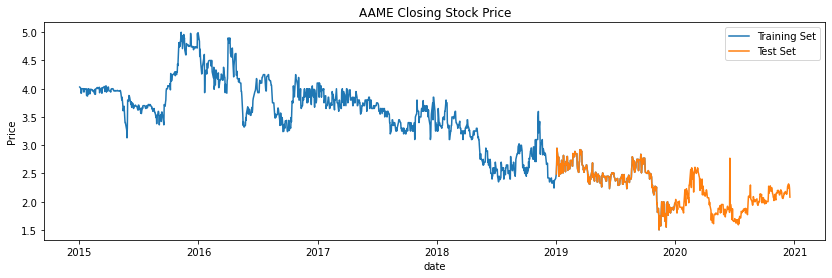

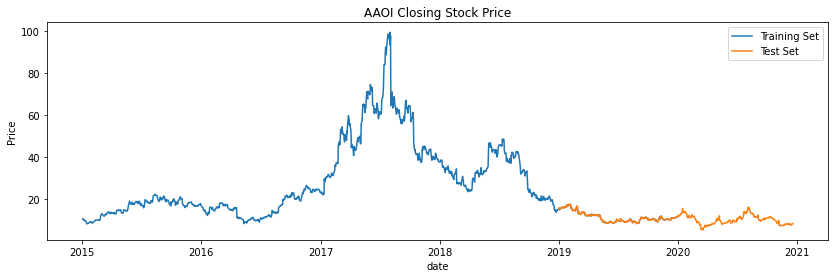

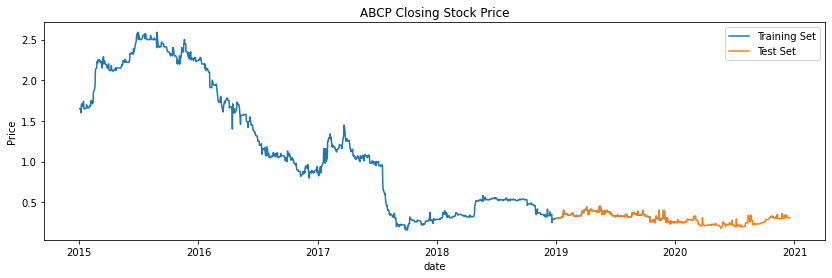

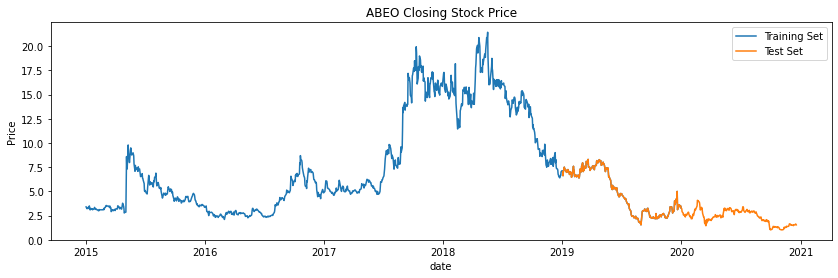

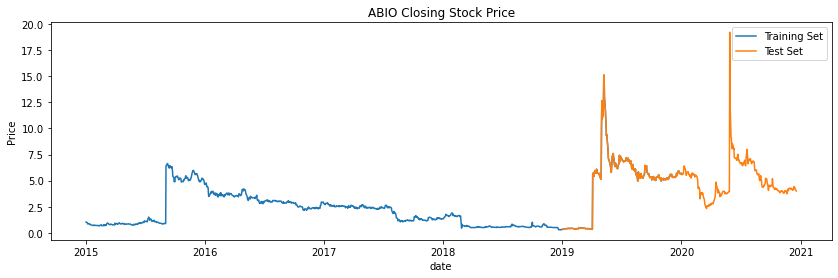

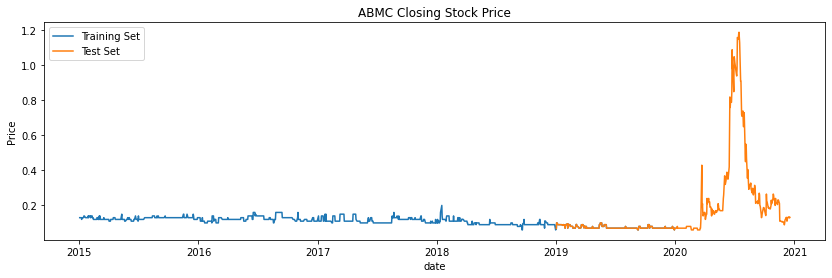

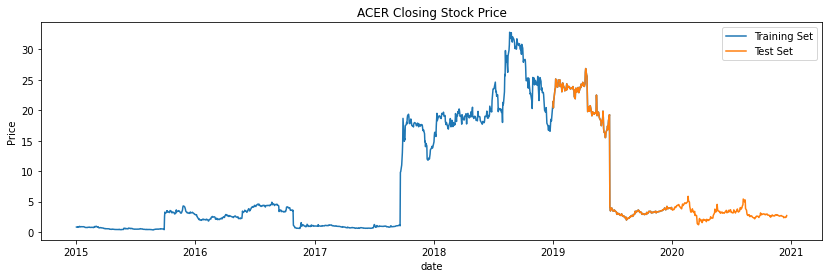

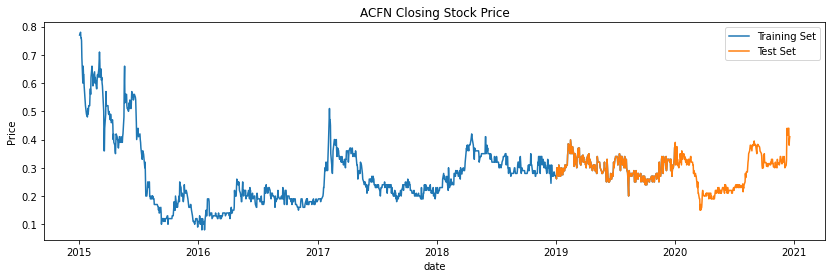

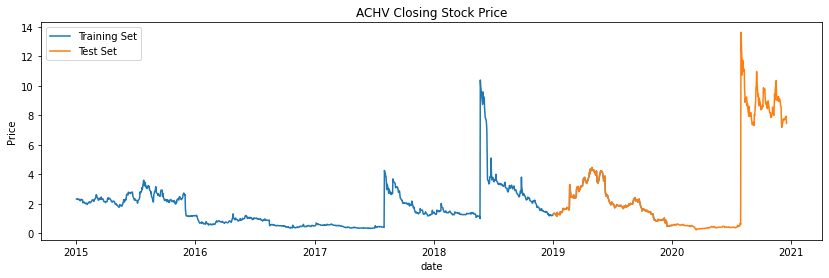

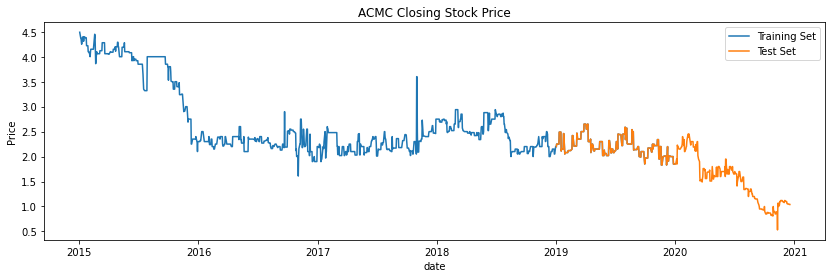

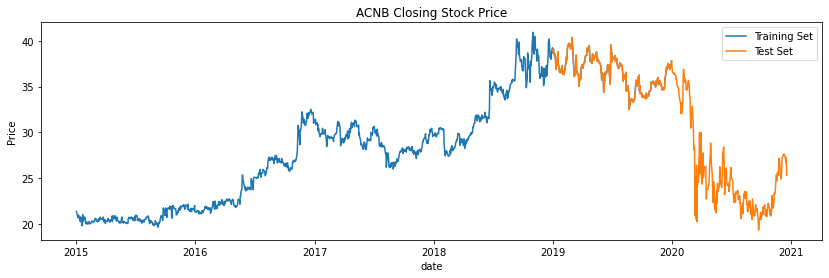

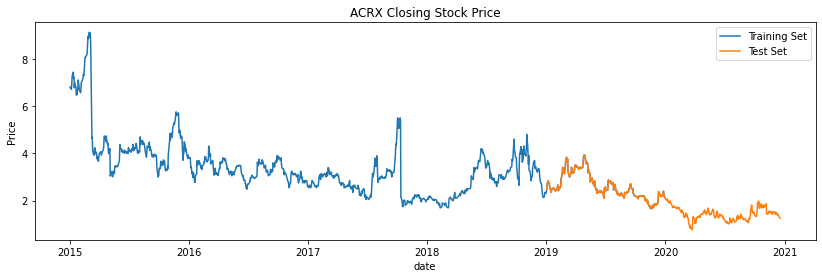

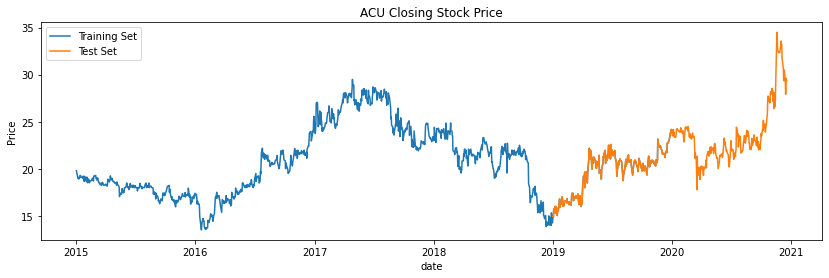

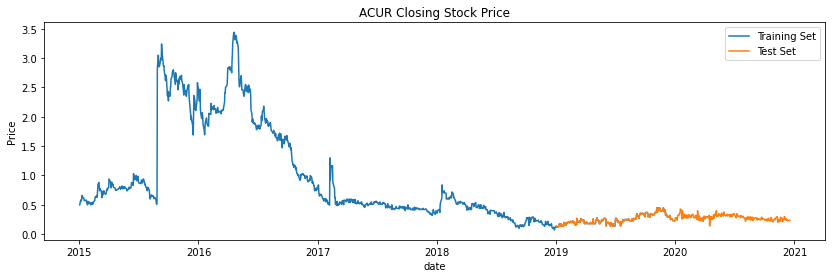

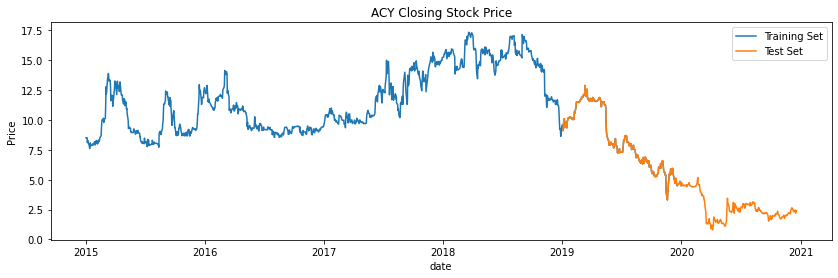

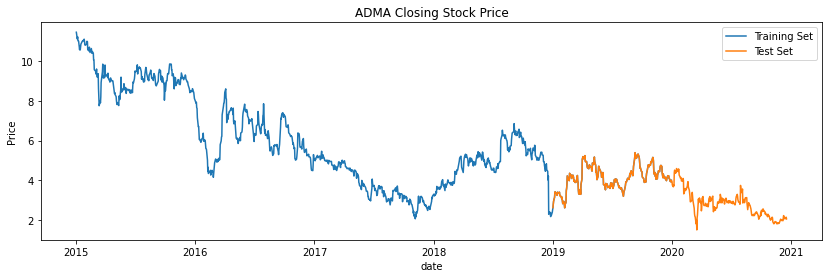

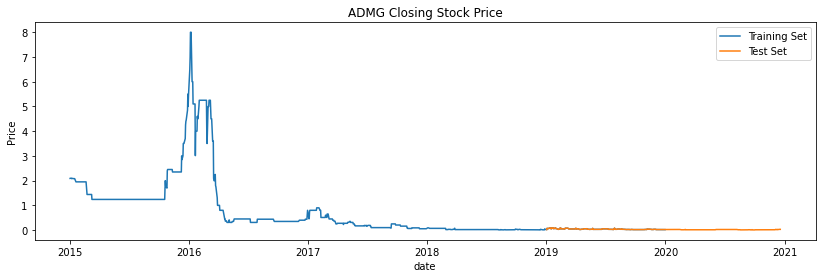

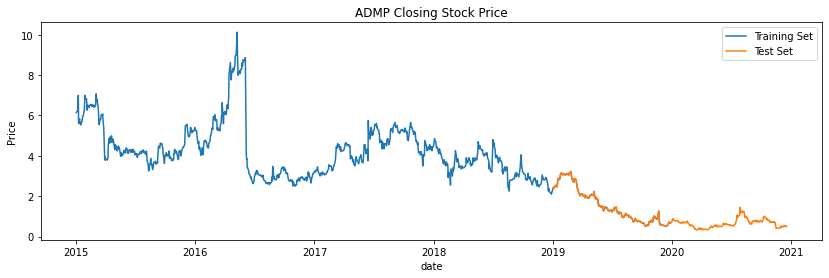

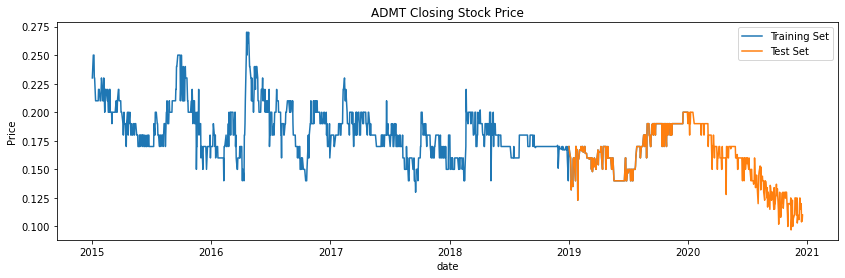

In [42]:
# We plot all companies we pick and paint which one is the training set and test set
#we stop at the ticker ADMT as it will take too long to load everything
# blue is the training data, orange is the test data
#some stocks have no test set at all
for i in stockList:
        plt.figure(figsize=(14,4))
        plt.plot(df_new[i]["Train"])
        plt.plot(df_new[i]["Test"])
        plt.ylabel("Price")
        plt.xlabel("date")
        plt.legend(["Training Set", "Test Set"])
        plt.title(i + " Closing Stock Price")
        if i == "ADMT":
            break

We rescale all stock price to zero for the lowest and 1 for the highest. Each of company have their own scale. We make another two dictionary which contain scaled price for each company. One contain train set and another contain test set.

We also create another dictionary for collecting the scaller. This will be useful when we want to inverse transform our prediction.

In [43]:
# Scaling the training set using MinMaxScalr
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
#     print(a1)
    try:
    #it found an array with no samples, meaning that it does not have values for 2019 to 2021, i have to either append the original dataset or just use throw error for this
        transform_train[i] = sc.fit_transform(a0)
        transform_test[i] = sc.fit_transform(a1)
    except ValueError:
        pass  # do nothing!

    
del a0
del a1
#should i just drop all stocks with no values after 2019

In [44]:
# We print the shape of our transformed set. Few company have more than the other. 
# This over value should be removed so the input will be uniform in term of shape
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    


AAME (1258, 1)
AAOI (1258, 1)
ABCP (1258, 1)
ABEO (1258, 1)
ABIO (1258, 1)
ABMC (1258, 1)
ACER (1258, 1)
ACFN (1258, 1)
ACHV (1258, 1)
ACMC (1258, 1)
ACNB (1258, 1)
ACRX (1258, 1)
ACU (1258, 1)
ACUR (1258, 1)
ACY (1258, 1)
ADMA (1258, 1)
ADMG (1258, 1)
ADMP (1258, 1)
ADMT (1258, 1)
ADUS (1258, 1)
ADYX (1258, 1)
AE (1258, 1)
AEGG (1258, 1)
AEHR (1258, 1)
AERI (1258, 1)
AEY (1258, 1)
AFHIF (1258, 1)
AGHC (1258, 1)
AGRX (1258, 1)
AGTC (1258, 1)
AGYS (1258, 1)
AHC (1258, 1)
AHH (1258, 1)
AHPI (1258, 1)
AIKI (1258, 1)
AIM (1258, 1)
AINC (1258, 1)
AIRI (1258, 1)
AIRT (1258, 1)
AKBA (1258, 1)
AKER (1258, 1)
ALBO (1258, 1)
ALDX (1258, 1)
ALIM (1258, 1)
ALOT (1258, 1)
ALSK (1258, 1)
ALT (1258, 1)
ALTX (1258, 1)
AMNB (1258, 1)
AMOT (1258, 1)
AMPE (1258, 1)
AMRB (1258, 1)
AMRK (1258, 1)
AMRS (1258, 1)
AMS (1258, 1)
AMSC (1258, 1)
AMSWA (1258, 1)
AMTX (1258, 1)
AMTY (1258, 1)
ANDR (1258, 1)
ANFC (1258, 1)
ANIX (1258, 1)
AOLS (1258, 1)
AOSL (1258, 1)
AP (1258, 1)
APDN (1258, 1)
APEN (1258, 1)
APEX 

MENB (1258, 1)
MERR (1258, 1)
MFCO (1258, 1)
MFIN (1258, 1)
MFNC (1258, 1)
MGEN (1258, 1)
MGHL (1258, 1)
MGPI (1258, 1)
MGTI (1258, 1)
MGYR (1258, 1)
MHH (1258, 1)
MHTX (1258, 1)
MICT (1258, 1)
MIND (1258, 1)
MITK (1258, 1)
MIXT (1258, 1)
MKRS (1258, 1)
MKTY (1258, 1)
MLP (1258, 1)
MLR (1258, 1)
MLSS (1258, 1)
MLVF (1258, 1)
MMAC (1258, 1)
MN (1258, 1)
MNOV (1258, 1)
MNTX (1258, 1)
MOFG (1258, 1)
MOJO (1258, 1)
MOSY (1258, 1)
MPAD (1258, 1)
MPB (1258, 1)
MPX (1258, 1)
MRCC (1258, 1)
MRIN (1258, 1)
MRLN (1258, 1)
MRMD (1258, 1)
MRNS (1258, 1)
MSB (1258, 1)
MSN (1258, 1)
MSON (1258, 1)
MTBC (1258, 1)
MTEM (1258, 1)
MTEX (1258, 1)
MUX (1258, 1)
MVBF (1258, 1)
MVC (1258, 1)
MVEN (1258, 1)
MVIS (1258, 1)
MX (1258, 1)
MXC (1258, 1)
NAII (1258, 1)
NANX (1258, 1)
NATH (1258, 1)
NATR (1258, 1)
NAUH (1258, 1)
NAVB (1258, 1)
NBIO (1258, 1)
NBN (1258, 1)
NBSE (1258, 1)
NBY (1258, 1)
NCBS (1258, 1)
NEN (1258, 1)
NEO (1258, 1)
NEON (1258, 1)
NEPT (1258, 1)
NERV (1258, 1)
NETE (1258, 1)
NEWT (1258, 1

In [45]:
for i in transform_test.keys():
    print(i, transform_test[i].shape)

AAME (497, 1)
AAOI (497, 1)
ABCP (497, 1)
ABEO (497, 1)
ABIO (497, 1)
ABMC (497, 1)
ACER (497, 1)
ACFN (497, 1)
ACHV (497, 1)
ACMC (497, 1)
ACNB (497, 1)
ACRX (497, 1)
ACU (497, 1)
ACUR (497, 1)
ACY (497, 1)
ADMA (497, 1)
ADMG (497, 1)
ADMP (497, 1)
ADMT (497, 1)
ADUS (497, 1)
ADYX (497, 1)
AE (497, 1)
AEGG (497, 1)
AEHR (497, 1)
AERI (497, 1)
AEY (497, 1)
AFHIF (497, 1)
AGHC (497, 1)
AGRX (497, 1)
AGTC (497, 1)
AGYS (497, 1)
AHC (497, 1)
AHH (497, 1)
AHPI (497, 1)
AIKI (497, 1)
AIM (497, 1)
AINC (497, 1)
AIRI (497, 1)
AIRT (497, 1)
AKBA (497, 1)
AKER (497, 1)
ALBO (497, 1)
ALDX (497, 1)
ALIM (497, 1)
ALOT (497, 1)
ALSK (497, 1)
ALT (497, 1)
ALTX (497, 1)
AMNB (497, 1)
AMOT (497, 1)
AMPE (497, 1)
AMRB (497, 1)
AMRK (497, 1)
AMRS (497, 1)
AMS (497, 1)
AMSC (497, 1)
AMSWA (497, 1)
AMTX (497, 1)
AMTY (497, 1)
ANDR (497, 1)
ANFC (497, 1)
ANIX (497, 1)
AOLS (497, 1)
AOSL (497, 1)
AP (497, 1)
APDN (497, 1)
APEN (497, 1)
APEX (497, 1)
APPS (497, 1)
APT (497, 1)
APTS (497, 1)
APYX (497, 1)
ARD

MAYS (497, 1)
MBCN (497, 1)
MBOT (497, 1)
MCBC (497, 1)
MCCX (497, 1)
MCEP (497, 1)
MCHX (497, 1)
MDIT (497, 1)
MDLY (497, 1)
MDVL (497, 1)
MEIP (497, 1)
MENB (497, 1)
MERR (497, 1)
MFCO (497, 1)
MFIN (497, 1)
MFNC (497, 1)
MGEN (497, 1)
MGHL (497, 1)
MGPI (497, 1)
MGTI (497, 1)
MGYR (497, 1)
MHH (497, 1)
MHTX (497, 1)
MICT (497, 1)
MIND (497, 1)
MITK (497, 1)
MIXT (497, 1)
MKRS (497, 1)
MKTY (497, 1)
MLP (497, 1)
MLR (497, 1)
MLSS (497, 1)
MLVF (497, 1)
MMAC (497, 1)
MN (497, 1)
MNOV (497, 1)
MNTX (497, 1)
MOFG (497, 1)
MOJO (497, 1)
MOSY (497, 1)
MPAD (497, 1)
MPB (497, 1)
MPX (497, 1)
MRCC (497, 1)
MRIN (497, 1)
MRLN (497, 1)
MRMD (497, 1)
MRNS (497, 1)
MSB (497, 1)
MSN (497, 1)
MSON (497, 1)
MTBC (497, 1)
MTEM (497, 1)
MTEX (497, 1)
MUX (497, 1)
MVBF (497, 1)
MVC (497, 1)
MVEN (497, 1)
MVIS (497, 1)
MX (497, 1)
MXC (497, 1)
NAII (497, 1)
NANX (497, 1)
NATH (497, 1)
NATR (497, 1)
NAUH (497, 1)
NAVB (497, 1)
NBIO (497, 1)
NBN (497, 1)
NBSE (497, 1)
NBY (497, 1)
NCBS (497, 1)
NEN (497

In [46]:
type(transform_test)

dict

In [47]:
keys=list(transform_test.keys())
values=list(transform_test.values())


In [48]:
len(values)

1258

In [50]:
transform_test['AAME'].shape[0]

497

In [51]:
transform_train

{'AAME': array([[0.72285714],
        [0.71714286],
        [0.69142857],
        ...,
        [0.1       ],
        [0.12      ],
        [0.13428571]]),
 'AAOI': array([[0.02641675],
        [0.02488217],
        [0.02049764],
        ...,
        [0.0344185 ],
        [0.03540502],
        [0.03836457]]),
 'ABCP': array([[0.61316872],
        [0.61316872],
        [0.59259259],
        ...,
        [0.03703704],
        [0.03703704],
        [0.04115226]]),
 'ABEO': array([[0.09342039],
        [0.08387745],
        [0.08588649],
        ...,
        [0.09417378],
        [0.09794073],
        [0.08689101]]),
 'ABIO': array([[0.05128205],
        [0.04723347],
        [0.04453441],
        ...,
        [0.36437247],
        [0.36234818],
        [0.36646424]]),
 'ABMC': array([[0.5       ],
        [0.5       ],
        [0.5       ],
        ...,
        [0.07142857],
        [0.        ],
        [0.07142857]]),
 'ACER': array([[0.0144321 ],
        [0.01538604],
        [0.0131396

In [52]:
len(y_t)

NameError: name 'y_t' is not defined

In [53]:
testset['AAME']['X'].shape

NameError: name 'testset' is not defined

In [54]:
np.array(X_test).shape

NameError: name 'X_test' is not defined

In [55]:
np.array(X_train).shape

NameError: name 'X_train' is not defined

In [56]:
X_train

NameError: name 'X_train' is not defined

In [58]:
# We think 60 feature will be enough training. We prepare shape our test and train set for neural network input

trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(0,1259):
        if (i < transform_test[j].shape[0]):
            X_train.append(transform_train[j][i-60:i,0])
            y_train.append(transform_train[j][i,0])
        else:
            break
    X_train, y_train = np.array(X_train), np.array(y_train)
    print(X_train)
#     trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 755):
        if(i < transform_test[j].shape[0]):
            X_test.append(transform_test[j][i-60:i,0])
            y_test.append(transform_test[j][i,0])
        else:
            break
    X_test, y_test = np.array(X_test), np.array(y_test)
#     testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    testset[j]["y"] = y_test


[array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array

<ipython-input-58-a87abbaf8015>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X_train, y_train = np.array(X_train), np.array(y_train)


IndexError: tuple index out of range

In [59]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(0,2516):
        X_train.append(transform_train[j][i-60:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 755):
        X_test.append(transform_test[j][i-60:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

IndexError: index 1258 is out of bounds for axis 0 with size 1258

In [ ]:
X_train.index(3,4,5)


# Single NN for multiple stocks
- However we need to be careful while performing a train test split. We need to first split and then zero pad the train test portions. Just like we have to scale the data before the split to avoid train data leaking into test data.
- There fore the order of data preparation is as follows
- Split the time series data in to train and test, we will take 80% of data as train and remaining as test data.
- Scale the train data, use the same scaler to transform the test data. Thus you will end up with one scaler per symbol
- Zero pad the train and test data
- Reshape train and test data

### Data Preparation

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
import os


In [ ]:
stop below here is no longer single nn


below are the functions needed for data preprocessing

In [ ]:
def Scale(train, test):
    scaler = MinMaxScaler()
    train = np.array(train)
    test = np.array(test)
    train = scaler.fit_transform(train.reshape(train.shape[0], -1))
    test = scaler.transform(test.reshape(test.shape[0], -1))
    return scaler, train, test

In [ ]:
def PrepareData(sequence, n_steps):
    x, y = [],[]
    length = sequence.shape[0]
    for i in range(length):
        end_index = i + n_steps
    
        if(end_index >= length):
            break;
     
        x.append(sequence[i:end_index]) 
        y.append(sequence[end_index])
    
    x = np.array(x)
    y = np.array(y)
    x = x.reshape(x.shape[0], n_steps, 1)
    return x, y

In [ ]:
def CreateModel(rate = 0.4, n_features = 501):
    model = Sequential()
    model.add(GRU(256, return_sequences=True, input_shape = (2, n_features)))
    model.add(Dropout(rate))
    model.add(LSTM(256))
    model.add(Dropout(rate))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_features)) # Number of outputs
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [ ]:
def split_sequences(sequences, n_steps):
    x, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
    
        if(end_ix > len(sequences)-1):
            break
      
        seq_x, seq_y = sequences[i: end_ix, :], sequences[end_ix, :]
    
        x.append(seq_x)
        y.append(seq_y)
    
    x = np.array(x)
    y = np.array(y)
  
    return x, y

In [ ]:
def ZeroPadding(sequence, maxPaddingWidth):
    length = len(sequence)
    if(length < maxPaddingWidth):
        retVal = np.pad(sequence.flatten(), (0, maxPaddingWidth-length), 'constant', constant_values=[0])
        return retVal
    return sequence
#   """
#   sequence = [1,2,3,4]
#   return sequence = [1,2,3,4,0,0,0,.... upto 1791 index]
  
#   sequence = [1,2,3,4, 5, 6, 7 .... 1791]
#   return sequence = [1,2,3,4, 5, 6, 7..... 1791] -> No padding as the length match
#   """


In [ ]:
data

In [ ]:
features = [col for col in df.columns if not col == 'Target']
X = data[features]
y = data[['Target']].values

In [ ]:
below is modelling already

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV


model = KerasRegressor(build_fn=CreateModel,verbose = 0)
params = {'epochs' : [100,150,200],
          'batch_size' : [100, 150],
          'n_features' : [y_test.shape[1]],
          'rate': [0.3],
          'validation_data' : [(X_test_sc, y_test)]}
# regressor = GridSearchCV(estimator = model, param_grid = params, n_jobs = 1, refit=True, scoring='neg_mean_squared_error')
# regressor.fit(X_train_sc, y_train)
# preds = regressor.predict(X_test_sc)

# Train/Test Split

In [ ]:
features = [col for col in df.columns if not col == 'Target']
X = df[features]
y = df[['Target']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
X_train.head()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

# Feature Scaling

In [ ]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

# TimeseriesGenerator
- We'll now convert our data into series' using TimeseriesGenerator. The length parameter dictates how many rows will constitute a sample. The generator also creates our batches.

In [ ]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=3, batch_size=64)


In [ ]:
batch_x, batch_y = train_sequences[0]


In [ ]:
batch_x.shape


In [ ]:
batch_y.shape


In [ ]:
batch_x[0]


In [ ]:
pd.DataFrame(X_train_sc, columns=X_train.columns).head(3)


In [ ]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)


In [ ]:
len(features)

# Modelling

## GRU

In [ ]:
model = Sequential()
model.add(GRU(34, input_shape=(3, 34), return_sequences=True)) #34 features (Open, High, ... 8-K)  and 3 rows for one sample 
model.add(GRU(34))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(lr=.0005), loss='binary_crossentropy', metrics=['acc'])

history = model.fit_generator(train_sequences, validation_data=test_sequences, epochs=20, verbose=0)
# fit is used when the entire training dataset can fit into the memory and no data augmentation is applied. . fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

In [ ]:
history2 = model.fit(X_train_sc,
                        y_train,
                        validation_data=(X_test_sc, y_test),
                        epochs=5,
                        verbose=1)

In [ ]:
model.summary()

In [ ]:
y_pred=history.predict(X_test_sc)
# y_test=scaler.inverse_transform(y_test)
# y_pred=scaler.inverse_transform(y_pred)

In [ ]:
_, train_acc = model.evaluate(X_train_sc, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_sc, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();


In [ ]:

plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

## LSTM

In [ ]:
model = Sequential()
model.add(LSTM(34, input_shape=(3, 34), return_sequences=True)) #34 features (Open, High, ... 8-K)  and 3 rows for one sample 
model.add(LSTM(34))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(lr=.0005), loss='binary_crossentropy', metrics=['acc'])

history = model.fit_generator(train_sequences, validation_data=test_sequences, epochs=20, verbose=0)

In [ ]:
model.summary()

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();


In [ ]:

plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

In [ ]:
# test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)


In [ ]:
X_test_sc

In [ ]:
y_test

In [ ]:
y_pred=model.predict(X_test_sc)
y_test=scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

# Merge all Data

In [ ]:
stop

In [ ]:

merged_df = price_volume_sorted_one_year.merge(daily_metrics_sorted_one_year, how="left", left_index=True,right_on='ticker')


In [ ]:
_, train_acc = model.evaluate(X_train_sc, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_sc, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
# merged_df = price_volume_sorted_one_year.merge(daily_metrics_sorted_one_year, how="left", left_index=True, right_index=True)


In [ ]:
merged_df

In [ ]:
merged_df = merged_df(event_filtered_one_year, how="left", left_index=True, right_index=True)

In [ ]:
merged_df

In [ ]:
stop

In [ ]:
r = a.join(b, on='date')

In [ ]:
d.join(f)

In [ ]:
find something less time consuming than concat

In [ ]:
df = pd.concat([a,b], axis = 1)

In [ ]:
df = pd.concat([d,f], axis = 1)

In [ ]:
df

In [ ]:
df = pd.concat([df,e], axis = 1)

In [ ]:
df

In [ ]:
#save df as a csv because it takes too long to run
df.to_csv('../dataset/modelling_dataset.csv')

In [ ]:
stop

In [ ]:
df = pd.merge(price_volume_sorted,daily_metrics_sorted, left_index=True, right_index=True, how='left')

In [ ]:
df = pd.merge(df,event_filtered, left_index=True, right_index=True, how='left')

In [ ]:
df.head()

In [ ]:
stop

# LSTM: Multiple stock ticker prices at a time
Before we build the LSTM model we need to prepare our data for the LSTM. The data need to be scaled and reshaped.

In [ ]:
#
def Scale(train, test):
  scaler = MinMaxScaler()
  train = np.array(train)
  test = np.array(test)
  train = scaler.fit_transform(train.reshape(train.shape[0], -1))
  test = scaler.transform(test.reshape(test.shape[0], -1))
  return scaler, train, test

In [ ]:
def PrepareData(sequence, n_steps):
  x, y = [],[]
  length = sequence.shape[0]
  for i in range(length):
    end_index = i + n_steps
    
    if(end_index >= length):
      break;
     
    x.append(sequence[i:end_index]) 
    y.append(sequence[end_index])
    
  x = np.array(x)
  y = np.array(y)
  x = x.reshape(x.shape[0], n_steps, 1)
  return x, y

In [ ]:
def CreateModel(rate = 0.4, n_features = 501):
  model = Sequential()
  model.add(GRU(256, return_sequences=True, input_shape = (2, n_features)))
  model.add(Dropout(rate))
  model.add(LSTM(256))
  model.add(Dropout(rate))
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(n_features)) # Number of outputs
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
  return model

In [ ]:
def split_sequences(sequences, n_steps):
  x, y = list(), list()
  for i in range(len(sequences)):
    end_ix = i + n_steps
    
    if(end_ix > len(sequences)-1):
      break
      
    seq_x, seq_y = sequences[i: end_ix, :], sequences[end_ix, :]
    
    x.append(seq_x)
    y.append(seq_y)
    
  x = np.array(x)
  y = np.array(y)
  
  return x, y

In [ ]:
# 1792 is the maximum number of observations for most of the stocks
# In order to predict the stock prices using multiple series
# together in an LSTM, we need to Zeropad the unknown values
MAX_VALUES_TRAIN = 1409 # 1792 * 0.8
MAX_VALUES_TEST = 353 # 1792 - 1409
def ZeroPadding(sequence, maxPaddingWidth):
    length = len(sequence)
    if(length < maxPaddingWidth):
        retVal = np.pad(sequence.flatten(), (0, maxPaddingWidth-length), 'constant', constant_values=[0])
        return retVal
    return sequence

#   sequence = [1,2,3,4]
#   return sequence = [1,2,3,4,0,0,0,.... upto 1791 index]
  
#   sequence = [1,2,3,4, 5, 6, 7 .... 1791]
#   return sequence = [1,2,3,4, 5, 6, 7..... 1791] -> No padding as the length match
  